## Week 1 Experiments

**Install the requirements for the project:**

In [1]:
#!pip install -r requirements.txt

#!pip install seaborn

**Load resources:**

In [2]:
run ./gg2_python/ct_include.ipy

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.set_context("poster")

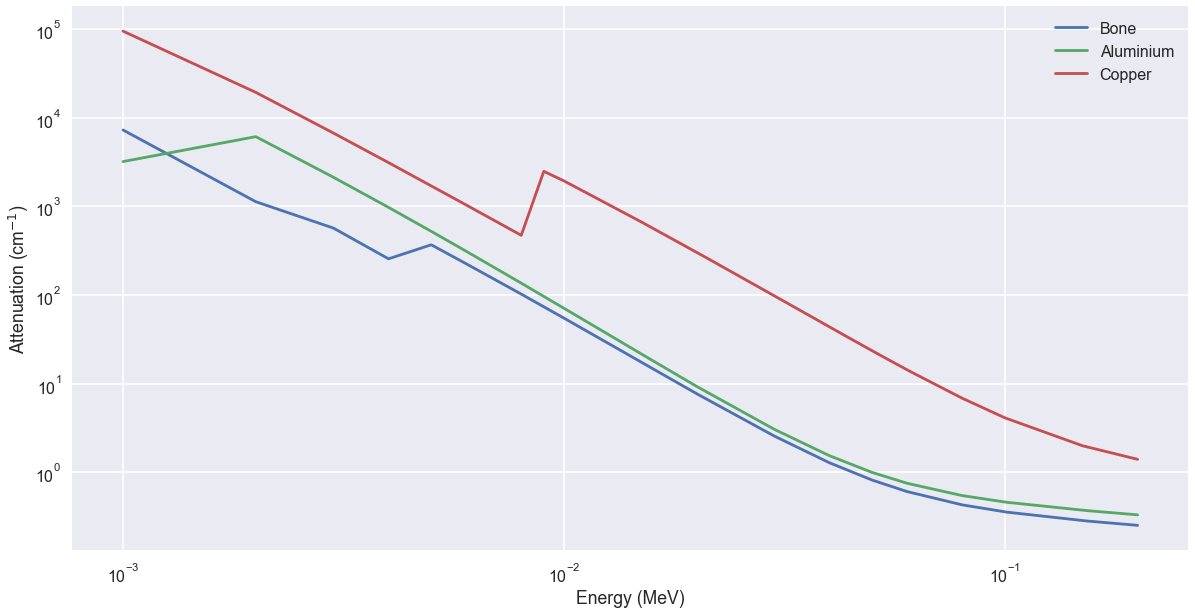

In [4]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(20,10)

materials = ["Bone", "Aluminium", "Copper"]

for mat in materials:
    ax1.plot(material.mev, material.coeff(mat), label=mat)
    
ax1.legend()
ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel(r"Attenuation (cm$^{-1}$)")
ax1.set_xscale('log')
ax1.set_yscale('log')

#### Finishing ```photons```

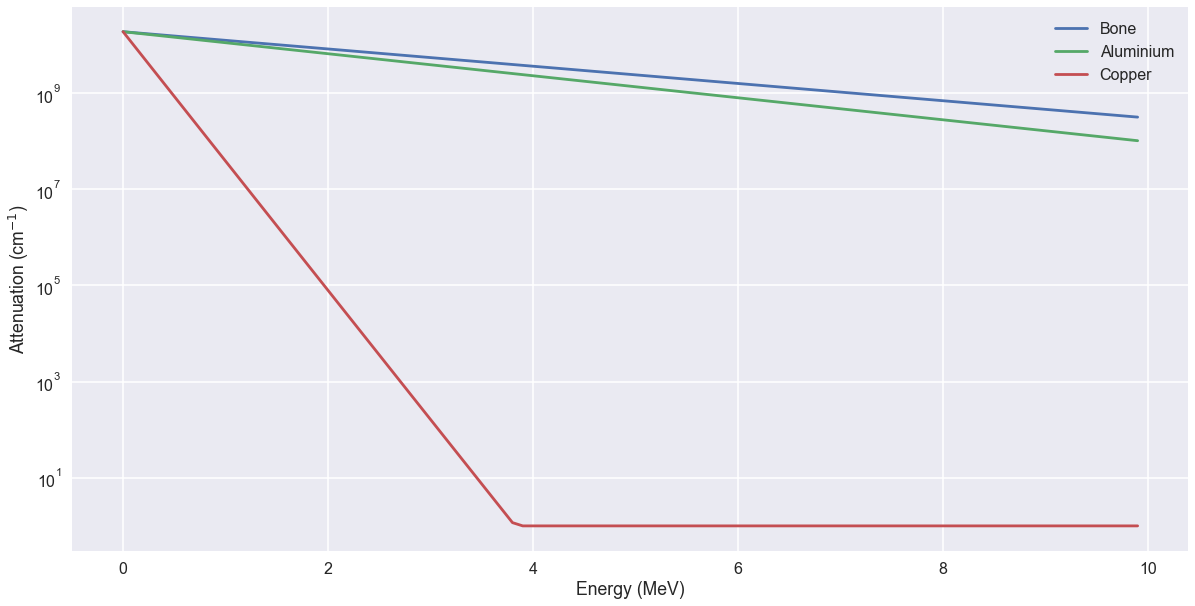

In [5]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(20,10)

materials = ["Air"]
test_materials = ["Bone", "Aluminium", "Copper"]

#for mat in materials:
    #ax2.plot(material.mev, material.coeff(mat), label=mat)

test_source = fake_source(material.mev, 0.12, material.coeff("Aluminium"), 1, method='ideal')

for mat in test_materials:
    atten_energies = ct_detect(test_source, material.coeff(mat), np.arange(0, 10.0, 0.1), 1)
    ax2.plot(np.arange(0,10.0,0.1), atten_energies, label=mat)
    
ax2.legend()
ax2.set_xlabel("Energy (MeV)")
ax2.set_ylabel(r"Attenuation (cm$^{-1}$)")
ax2.set_yscale('log')

#### Sinograms using ```ct_scan```

In [6]:
phantom_point = ct_phantom(material.name, 256, 3, "Titanium", point_offset=(60,60))

sinogram = ct_scan(source.photons[1], material, phantom_point, 0.1, 256)

Scanning angle: 256   


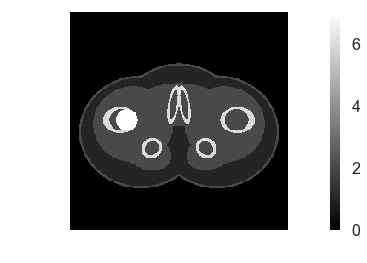

In [7]:
draw(phantom_point)

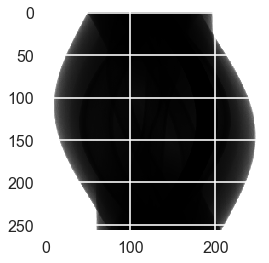

In [8]:
plt.imshow(sinogram, cmap="gray")

Scanning angle: 1   


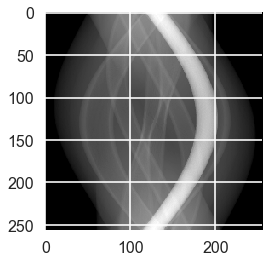

In [9]:
calibrated_phantom = ct_calibrate(source.photons[1], material, sinogram, 0.1)

plt.imshow(calibrated_phantom, cmap="gray")

#### Scan and reconstruct

Scanning angle: 512   
Scanning angle: 1   
Ramp filtering...
Reconstructing angle: 512   


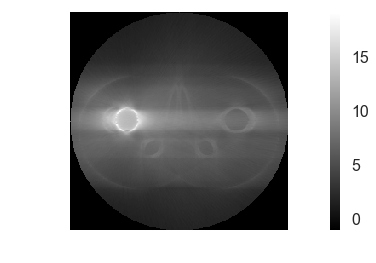

In [10]:
reconstructed_phantom = scan_and_reconstruct(source.photons[1], material, phantom_point, 0.1, 512, 1)

draw(reconstructed_phantom)

#### Ram-Lak filter

Scanning angle: 512   
Scanning angle: 1   
Ramp filtering...
Reconstructing angle: 512   
Scanning angle: 512   
Scanning angle: 1   
Ramp filtering...
Reconstructing angle: 512   
Scanning angle: 512   
Scanning angle: 1   
Ramp filtering...
Reconstructing angle: 512   


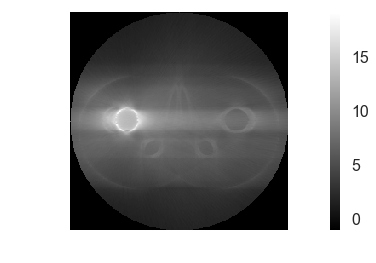

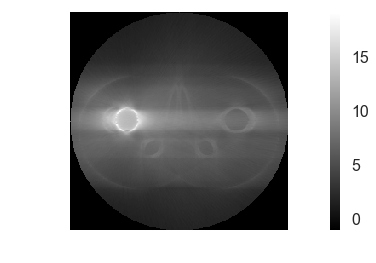

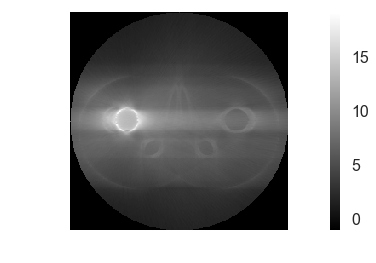

In [13]:
reconstructed_phantom_1 = scan_and_reconstruct(source.photons[1], material, phantom_point, 0.1, 512, 1)

reconstructed_phantom_128 = scan_and_reconstruct(source.photons[1], material, phantom_point, 0.1, 512, 128)

reconstructed_phantom_256 = scan_and_reconstruct(source.photons[1], material, phantom_point, 0.1, 512, 256)

draw(reconstructed_phantom_1)

draw(reconstructed_phantom_128)

draw(reconstructed_phantom_256)